In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. Emission Mixtures/P1011.3. Analyses/P1011.3.2. Biomarker Cluster Analysis/Output')
cur_date = "070123"

library(readxl)
library(tidyverse)
library(reshape2)
library(factoextra)
library(cowplot)

# reading in files
mRNA_df = data.frame(read_excel("Input/Imputed_mRNA_Data_042623.xlsx"))
proteomics_5_df = data.frame(read_excel("Input/Proteomics_Data_5ug_040423.xlsx", sheet = 2))
proteomics_25_df = data.frame(read_excel("Input/Proteomics_Data_25ug_040423.xlsx", sheet = 2))
cytokine_df = data.frame(read_excel("Input/Cytokine_Data_050423.xlsx", sheet = 2))
nemenyis_df = data.frame(read_excel("Input/Nemenyis_PostHoc_Biomarker_Results_062923.xlsx"))
nemenyis_df$Time.Point = as.numeric(nemenyis_df$Time.Point)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Warning message:
“Expecting numeric in E1226 / R1226C5: got 'NA'”
Warning message:
“Expecting numeric in E1227 / R1227C5: got 'NA'”
Warning message:
“Expecting numeric in E1228 / R1228C5

In [2]:
head(mRNA_df)
head(proteomics_25_df)
head(cytokine_df)
head(nemenyis_df)

,Subject_ID,Condensate,Burn_Condition,Concentration,Time_Point,mRNA,ddCT_pslog2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,M_6,PBS,PBS,NA,24,HMOX1,4.871886
2,M_6,PBS,PBS,NA,24,ALDH3A1,4.837012
3,M_6,PBS,PBS,NA,24,CXCL1,4.822372
4,M_6,PBS,PBS,NA,24,CXCR1,3.940873
5,M_6,PBS,PBS,NA,24,GCLC,4.863186
6,M_6,PBS,PBS,NA,24,GCLM,4.834127


,Subject_No,Subject_ID,Protein_Accession,Gene_Name,Description,Condensate,Burn_Condition,Concentration,Intensity,Intensity_pslog2
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,F_1,CO3_HUMAN,C3,Complement C3 OS=Homo sapiens OX=9606 GN=C3 PE=1 SV=2,C,F,25,1488600000,30.47131
2,2,M_2,CO3_HUMAN,C3,Complement C3 OS=Homo sapiens OX=9606 GN=C3 PE=1 SV=2,C,F,25,3806600000,31.82586
3,3,M_3,CO3_HUMAN,C3,Complement C3 OS=Homo sapiens OX=9606 GN=C3 PE=1 SV=2,C,F,25,3900000000,31.86083
4,4,F_4,CO3_HUMAN,C3,Complement C3 OS=Homo sapiens OX=9606 GN=C3 PE=1 SV=2,C,F,25,5373200000,32.32313
5,5,F_5,CO3_HUMAN,C3,Complement C3 OS=Homo sapiens OX=9606 GN=C3 PE=1 SV=2,C,F,25,2595200000,31.27320
6,6,M_6,CO3_HUMAN,C3,Complement C3 OS=Homo sapiens OX=9606 GN=C3 PE=1 SV=2,C,F,25,5780700000,32.42860


,Subject_No,Subject_ID,Condensate,Burn_Condition,Condensate_Conc,Cytokine,Cytokine_Conc,Cytokine_Conc_pslog2
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1,F_1,C,F,1,Eotaxin3,21.750958,4.507855
2,1,F_1,C,F,25,Eotaxin3,11.624224,3.658123
3,1,F_1,C,F,5,Eotaxin3,17.828714,4.234863
4,1,F_1,C,S,1,Eotaxin3,22.798534,4.572801
5,1,F_1,C,S,25,Eotaxin3,10.342567,3.503675
6,1,F_1,C,S,5,Eotaxin3,9.140652,3.342078


,Biomarker,Variable.Name,Condensate,Concentration,Time.Point,Comparison,Statistic,FC,P.Value,P.Adj
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Cytokine,Eotaxin3,C,1,NA,F vs. PBS,0.816496580927726,0.183270817992716,0.832229218116194,0.9940869
2,Cytokine,Eotaxin3,C,1,NA,F vs. S,0.816496580927726,-0.0622070863035251,0.832229218116194,0.9940869
3,Cytokine,Eotaxin3,C,1,NA,PBS vs. S,1.63299316185545,0.245477904296242,0.480432575468159,0.9940869
4,Cytokine,Eotaxin3,C,25,NA,F vs. PBS,0.408248290463863,-0.116862615237046,0.955103094750503,1.0000000
5,Cytokine,Eotaxin3,C,25,NA,F vs. S,0.408248290463863,-0.142860897794767,0.955103094750503,1.0000000
6,Cytokine,Eotaxin3,C,25,NA,PBS vs. S,0.816496580927726,0.0259982825577208,0.832229218116194,1.0000000


This analysis will use PCA to explore if there are clusters of biomarkers based on the condensate or burn condition. First will identify the biomarkers that are significant (p adj < 0.2).

In [3]:
sig_mRNA_df = nemenyis_df %>%
    filter(Biomarker == "mRNA", P.Adj < 0.2)
sig_mRNAs = unique(sig_mRNA_df$Variable.Name)

sig_proteomics_df = nemenyis_df %>%
    filter(Biomarker == "Protein", P.Adj < 0.2)
sig_proteins = unique(sig_proteomics_df$Variable.Name)

sig_cytokine_df = nemenyis_df %>%
    filter(Biomarker == "Cytokine", P.Adj < 0.2)
sig_cytokines = unique(sig_cytokine_df$Variable.Name)

First need to create dataframes with the FC, which entails subtracting the control value from the experimental (smoldering or flaming) value.

In [25]:
# the mRNA df doesn't consistently test all 3 concentrations (1,5, or 25 micrograms) or 
# time points(4,24,72) therefore so we'll create separate dfs for each concentration and time point
split_mRNA_df = mRNA_df %>%
    group_by(Burn_Condition, Concentration, Time_Point) %>%
    group_split()

conc_f_1_24_mRNA_df = split_mRNA_df[[1]] 
conc_f_1_72_mRNA_df = split_mRNA_df[[2]]
conc_f_25_4_mRNA_df = split_mRNA_df[[3]]
conc_f_25_24_mRNA_df = split_mRNA_df[[4]]
conc_f_25_72_mRNA_df = split_mRNA_df[[5]]
conc_f_5_24_mRNA_df = split_mRNA_df[[6]]
conc_f_5_72_mRNA_df = split_mRNA_df[[7]]
concc_4_mRNA_df = split_mRNA_df[[8]]
concc_24_mRNA_df = split_mRNA_df[[9]] 
concc_72_mRNA_df = split_mRNA_df[[10]]
conc_s_1_24_mRNA_df = split_mRNA_df[[11]]
conc_s_1_72_mRNA_df = split_mRNA_df[[12]]
conc_s_25_4_mRNA_df = split_mRNA_df[[13]]
conc_s_25_24_mRNA_df = split_mRNA_df[[14]]
conc_s_25_72_mRNA_df = split_mRNA_df[[15]]
conc_s_5_24_mRNA_df = split_mRNA_df[[16]]
conc_s_5_72_mRNA_df = split_mRNA_df[[17]]

# still splitting the proteomics df based on burn condition and concentration
split_protein_df = rbind(proteomics_25_df, proteomics_5_df) %>%
    group_by(Burn_Condition, Concentration) %>%
    group_split()

f_5_protein_df = split_protein_df[[1]]
f_25_protein_df = split_protein_df[[2]]
con_5_protein_df = split_protein_df[[3]]
con_25_protein_df = split_protein_df[[4]]
s_5_protein_df = split_protein_df[[5]]
s_25_protein_df = split_protein_df[[6]]

In [5]:
get_mRNA_FC_df = function(experimental_df, control_df){
    # WORDS
    
    # reformatting dfs for inner join
    trans_experimental_df = experimental_df %>%
        rename(E_ddCT_pslog2 = ddCT_pslog2) %>%
        select(-Burn_Condition)
    
    trans_control_df = control_df %>%
        rename(C_ddCT_pslog2 = ddCT_pslog2) %>%
        select(-c("Burn_Condition", "Condensate", "Concentration"))
    
    combined_df = inner_join(trans_experimental_df, trans_control_df) %>%
        mutate(FC = E_ddCT_pslog2 - C_ddCT_pslog2, Burn_Condition = experimental_df$Burn_Condition)
    
    # reordering and removing some cols
    combined_df = combined_df[, c(1,5,9,2:4,8)]
    
    return(combined_df)
}

# calling fn
f_1_24_mRNA_df = get_mRNA_FC_df(conc_f_1_24_mRNA_df, concc_24_mRNA_df)
f_1_72_mRNA_df = get_mRNA_FC_df(conc_f_1_72_mRNA_df, concc_72_mRNA_df)
f_25_4_mRNA_df = get_mRNA_FC_df(conc_f_25_4_mRNA_df, concc_4_mRNA_df)
f_25_24_mRNA_df = get_mRNA_FC_df(conc_f_25_24_mRNA_df, concc_24_mRNA_df)
f_25_72_mRNA_df = get_mRNA_FC_df(conc_f_25_72_mRNA_df, concc_72_mRNA_df)
f_5_24_mRNA_df = get_mRNA_FC_df(conc_f_5_24_mRNA_df, concc_24_mRNA_df)
f_5_72_mRNA_df = get_mRNA_FC_df(conc_f_5_72_mRNA_df, concc_72_mRNA_df)
s_1_24_mRNA_df = get_mRNA_FC_df(conc_s_1_24_mRNA_df, concc_24_mRNA_df)
s_1_72_mRNA_df = get_mRNA_FC_df(conc_s_1_72_mRNA_df, concc_72_mRNA_df)
s_25_4_mRNA_df = get_mRNA_FC_df(conc_s_25_4_mRNA_df, concc_4_mRNA_df)
s_25_24_mRNA_df = get_mRNA_FC_df(conc_s_25_24_mRNA_df, concc_24_mRNA_df)
s_25_72_mRNA_df = get_mRNA_FC_df(conc_s_25_72_mRNA_df, concc_72_mRNA_df)
s_5_24_mRNA_df = get_mRNA_FC_df(conc_s_5_24_mRNA_df, concc_24_mRNA_df)
s_5_72_mRNA_df = get_mRNA_FC_df(conc_s_5_72_mRNA_df, concc_72_mRNA_df)

Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`
Joining with `by = join_by(Subject_ID, Time_Point, mRNA)`


In [29]:
get_protein_FC_df = function(experimental_df, control_df){
    # WORDS
    
    # reformatting dfs for inner join
    trans_experimental_df = experimental_df %>%
        rename(E_Intensity_pslog2 = Intensity_pslog2) %>%
        select(-Burn_Condition)
    
    trans_control_df = control_df %>%
        rename(C_Intensity_pslog2 = Intensity_pslog2) %>%
        select(-c("Burn_Condition", "Condensate", "Concentration"))
    
    combined_df = inner_join(trans_experimental_df, trans_control_df) %>%
        mutate(FC = E_Intensity_pslog2 - C_Intensity_pslog2, Burn_Condition = unique(experimental_df$Burn_Condition))
    
    # reordering and removing some cols
    combined_df = combined_df[, c(1,5,9,2:4,8)]
    
    return(combined_df)
}

# calling fn
f_5_protein_FC_df = get_protein_FC_df(f_5_protein_df, con_5_protein_df)
f_25_protein_df = get_protein_FC_df(f_25_protein_df, con_25_protein_df)
s_5_protein_df = get_protein_FC_df(s_5_protein_df, con_5_protein_df)
s_25_protein_df = get_protein_FC_df(s_25_protein_df, con_25_protein_df)

Joining with `by = join_by(Subject_No, Subject_ID, Protein_Accession,
Gene_Name, Description, Intensity)`
Joining with `by = join_by(Subject_No, Subject_ID, Protein_Accession,
Gene_Name, Description, Intensity)`
Joining with `by = join_by(Subject_No, Subject_ID, Protein_Accession,
Gene_Name, Description, Intensity)`
Joining with `by = join_by(Subject_No, Subject_ID, Protein_Accession,
Gene_Name, Description, Intensity)`


In [18]:
# creating 1 df and casting wide
wider_FC_mRNA_df = data.frame(Biomarker = "mRNA", rbind(f_1_24_mRNA_df, f_1_72_mRNA_df, f_25_4_mRNA_df, f_25_24_mRNA_df, 
                    f_25_72_mRNA_df, f_5_24_mRNA_df, f_5_72_mRNA_df, s_1_24_mRNA_df, s_1_72_mRNA_df, s_25_4_mRNA_df, 
                    s_25_24_mRNA_df, s_25_72_mRNA_df, s_5_24_mRNA_df, s_5_72_mRNA_df)) %>%
    # creating a column that denotes the biomarker
    mutate(Biomarker = "mRNA") %>%
    # creating sample ids
    unite("SampleID", c(colnames(mRNA_df)[c(6,2:5)]), remove = FALSE) %>%
    pivot_wider(names_from = "Subject_ID", values_from = "FC") %>%
    # removing an outlier sample
    #filter(SampleID != "MCP1_C_F_25_72") %>%
    column_to_rownames(var = "SampleID") %>%
    # keeping sig mRNAs only
    filter(mRNA %in% sig_mRNAs)

head(wider_FC_mRNA_df)

,Biomarker,mRNA,Burn_Condition,Condensate,Concentration,Time_Point,M_6,F_5,F_1,M_2,M_3,F_4
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMOX1_P_F_1_24,mRNA,HMOX1,F,P,1,24,-0.097110597,0.05902657,0.05309206,0.062277734,0.05838098,0.06554942
ALDH3A1_P_F_1_24,mRNA,ALDH3A1,F,P,1,24,-0.074639586,0.11031939,0.08389458,0.020942492,0.15325120,0.08453720
CXCL1_P_F_1_24,mRNA,CXCL1,F,P,1,24,-0.053856653,0.01561812,0.07436054,-0.007670336,-0.02856168,0.02807430
GCLC_P_F_1_24,mRNA,GCLC,F,P,1,24,-0.071148662,0.05494071,0.05581585,0.041693764,0.05872785,0.05904007
GCLM_P_F_1_24,mRNA,GCLM,F,P,1,24,-0.019263679,0.05734705,0.03778313,0.028796665,0.04895295,0.03222849
GMCSF2_P_F_1_24,mRNA,GMCSF2,F,P,1,24,-0.008681242,0.01407478,0.05715263,-0.062750733,-0.19638058,0.01227679


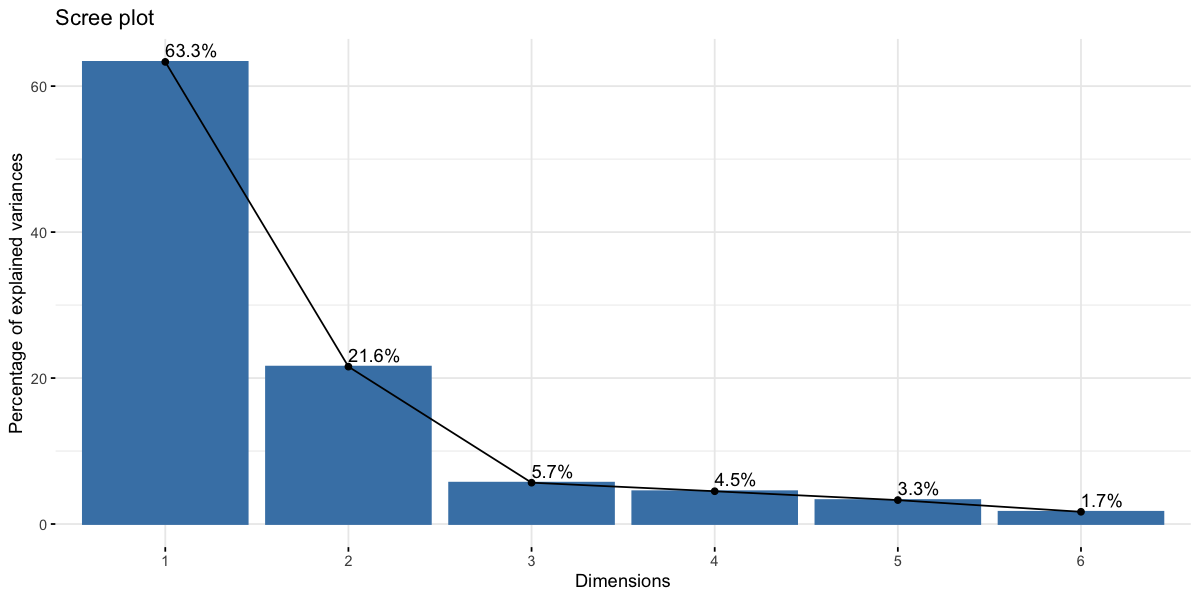

In [19]:
# running pca 
mRNA_pca = prcomp(wider_FC_mRNA_df[,7:12], center = TRUE)
#protein_pca = prcomp(wider_proteomics_df[,2:7], center = TRUE)

# looking a scree plot to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width = 10, repr.plot.height = 5) #changing size
fviz_eig(mRNA_pca, addlabels = TRUE)
#fviz_eig(protein_pca, addlabels = TRUE)

In [ ]:
# creating 1 df with eigenvectors, pslog2 values, condensate, burn condition data
mRNA_pca_df = data.frame(mRNA_pca$x[,1:2]) %>%
               rownames_to_column(var = "Sample_ID") 
protein_pca_df = data.frame(protein_pca$x[,1:2]) %>%
               rownames_to_column(var = "Sample_ID") 
more_data_biomarker_df =  rbind(wider_cytokine_df[,1:10] %>% 
               rename(Biomarker_Name = Cytokine), wider_mRNA_df[,1:10] %>% 
                rename(Biomarker_Name = mRNA), 
               wider_proteomics_df[,1:10] %>% 
                rename(Biomarker_Name = Protein_Accession)) %>%
               rownames_to_column(var = "Sample_ID")

full_eigenvector_df = inner_join(rbind(mRNA_pca_df, protein_pca_df), more_data_biomarker_df) 
    
head(full_eigenvector_df)